In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [5]:
import pandas as pd

def add_travel_itinerary(filename):
    # Get user inputs
    destination = input("Enter the destination: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    activities = input("Enter activities planned: ")
    accommodation = input("Enter the accommodation: ")
    transport = input("Enter the transport: ")
    # Create a DataFrame for the new entry
    new_entry = pd.DataFrame({
        'Destination': [destination],
        'Start Date': [start_date],
        'End Date': [end_date],
        'Activities': [activities],
        'Accommodation': [accommodation],
        'Transport': [transport],
    })
   # Try to read the existing file, or create a new one if it doesn't exist
    try:
        df = pd.read_csv("travel_itineraries.csv")
    except FileNotFoundError:
        # Create an empty DataFrame with required columns if file doesn't exist
        df = pd.DataFrame(columns=['Destination', 'Start Date', 'End Date','Activities',
            'Accommodation', 'Transport'])

    # Append the new entry to the DataFrame
    df = pd.concat([df, new_entry], ignore_index=True)

    # Save the updated DataFrame back to the CSV file
    df.to_csv(filename, index=False)
    print("Itinerary added successfully!")

# Example usage
add_travel_itinerary("travel_itineraries.csv")

Enter the destination: London
Enter the start date (YYYY-MM-DD): 2025-01-07
Enter the end date (YYYY-MM-DD): 2025-01-11
Enter activities planned: Tower of London
Enter the accommodation: Hotel Intercontinental
Enter the transport: Flight
Itinerary added successfully!


In [6]:
import pandas as pd

# Load trips data from CSV file
def load_trips(filename):
    try:
        return pd.read_csv("travel_itineraries.csv")
    except FileNotFoundError:
        # If the file doesn't exist, create an empty DataFrame with required columns
        return pd.DataFrame(columns=['Destination', 'Start Date', 'End Date','Activities',
            'Accommodation', 'Transport'])

# Save trips data to CSV file
def save_trips(df, filename):
    df.to_csv("travel_itineraries.csv", index=False)
    print("Trips saved successfully!")

# Add a new trip
def add_trip(filename):
    df = load_trips("travel_itineraries.csv")
    destination = input("Enter the destination: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    activities = input("Enter activities planned: ")
    accommodation = input("Enter the accommodation: ")
    transport = input("Enter the transport: ")
    new_trip = pd.DataFrame({
        'Destination': [destination],
        'Start Date': [start_date],
        'End Date': [end_date],
        'Activities': [activities],
        'Accommodation': [accommodation],
        'Transport': [transport],
    })
    df = pd.concat([df, new_trip], ignore_index=True)
    save_trips(df, filename)
# View all trips
def view_trips(filename):
    df = load_trips("travel_itineraries.csv")
    print("\nAll Trips:")
    print(df)

# Filter trips by destination
def filter_trips_by_destination(filename):
    df = load_trips("travel_itineraries.csv")
    destination = input("Enter the destination to filter by: ")
    filtered = df[df['Destination'].str.contains(destination, case=False, na=False)]
    if not filtered.empty:
        print(f"\nTrips to {destination}:")
        print(filtered)
    else:
        print(f"No trips found for {destination}.")
# Update a trip by index
def update_trip(filename):
    df = load_trips("travel_itineraries.csv")
    print(df)
    index = int(input("Enter the index of the trip to update: "))
    if index in df.index:
        column = input("Enter the column to update (Destination, Start Date, End Date,Activities, Accommodation, Transport): ")
        if column in df.columns:
            new_value = input(f"Enter the new value for {column}: ")
            df.at[index, column] = new_value
            save_trips(df, filename)
            print("Trip updated successfully!")
        else:
            print("Invalid column!")
    else:
        print("Invalid index!")
# Delete a trip by index
def delete_trip(filename):
    df = load_trips("travel_itineraries.csv")
    print(df)
    index = int(input("Enter the index of the trip to delete: "))
    if index in df.index:
        df = df.drop(index)
        save_trips(df, filename)
        print(f"Trip at index {index} deleted successfully!")
    else:
        print("Invalid index!")
# Example usage menu
def trip_management_menu():
    filename = "trips.csv"
    while True:
        print("\nTrip Management Menu:")
        print("1. Add a new trip")
        print("2. View all trips")
        print("3. Filter trips by destination")
        print("4. Update a trip")
        print("5. Delete a trip")
        print("6. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            add_trip(filename)
        elif choice == '2':
            view_trips(filename)
        elif choice == '3':
            filter_trips_by_destination(filename)
        elif choice == '4':
            update_trip(filename)
        elif choice == '5':
            delete_trip(filename)
        elif choice == '6':
            print("Exiting Trip Management.")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the trip management system
trip_management_menu()


Trip Management Menu:
1. Add a new trip
2. View all trips
3. Filter trips by destination
4. Update a trip
5. Delete a trip
6. Exit
Enter your choice: 1
Enter the destination: Goa
Enter the start date (YYYY-MM-DD): 2025-02-02
Enter the end date (YYYY-MM-DD): 2025-02-07
Enter activities planned: Dudhsagar Falls
Enter the accommodation: Hotel Vincent
Enter the transport: Flight
Trips saved successfully!

Trip Management Menu:
1. Add a new trip
2. View all trips
3. Filter trips by destination
4. Update a trip
5. Delete a trip
6. Exit
Enter your choice: 2

All Trips:
  Destination  Start Date    End Date          Activities  \
0       Paris  2024-12-02  2024-12-07  Eiffel Tower visit   
1        Rome  2024-12-20  2024-12-26      Trevi Fountain   
2      London  2025-01-07  2025-01-11     Tower of London   
3         Goa  2025-02-02  2025-02-07     Dudhsagar Falls   

            Accommodation Transport  
0        Hotel Le Meurice    Flight  
1       Hotel Le Meridian    Flight  
2  Hotel I

In [7]:
import pandas as pd

def display_trip_summary(filename):
    try:
        # Load the trip data
        df = pd.read_csv("travel_itineraries.csv")

        # Ensure the 'Start Date' is in datetime format
        df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

        # Remove rows with missing data
        df = df.dropna(subset=['Destination', 'Start Date', 'End Date'])

        # Total number of planned trips
        total_trips = len(df)

        # Upcoming trips (Start Date > current date)
        upcoming_trips = df[df['Start Date'] > pd.Timestamp.now()]
        num_upcoming = len(upcoming_trips)
       # Trips by destination
        trips_by_destination = df.groupby('Destination').size()

        # Display summary
        print("\nSummary of Planned Trips:")
        print(f"Total Planned Trips: {total_trips}")
        print(f"Number of Upcoming Trips: {num_upcoming}")
        print("\nTrips by Destination:")
        print(trips_by_destination)

    except FileNotFoundError:
        print("The specified file was not found. Please check the file path.")

# Example usage
display_trip_summary("travel_itineraries.csv")


Summary of Planned Trips:
Total Planned Trips: 4
Number of Upcoming Trips: 3

Trips by Destination:
Destination
Goa       1
London    1
Paris     1
Rome      1
dtype: int64


In [11]:
import pandas as pd

def add_travel_expenses(filename):
    # Get user inputs for travel expenses
    destination = input("Enter the destination: ")
    transport = float(input("Enter the transport expense: $"))
    accommodation = float(input("Enter the accommodation expense: $"))
    food = float(input("Enter the food expense: $"))
    activities = float(input("Enter the activities expense: $"))
    miscellaneous = float(input("Enter the miscellaneous expense: $"))

    # Calculate total expenses
    total_expense = transport + accommodation + food + activities + miscellaneous

    # Create a DataFrame for the new expense entry
    new_entry = pd.DataFrame({
        'Destination': [destination],
        'Transport': [transport],
        'Accommodation': [accommodation],
        'Food': [food],
        'Activities': [activities],
        'Miscellaneous': [miscellaneous],
        'Total Expense': [total_expense]
    })

    # Try to read the existing file, or create a new one if it doesn't exist
    try:
        df = pd.read_csv("travel_expenses.csv")
    except FileNotFoundError:
        # Create an empty DataFrame with the required columns if the file doesn't exist
        df = pd.DataFrame(columns=['Destination', 'Transport', 'Accommodation', 'Food', 'Activities', 'Miscellaneous', 'Total Expense'])

 # Append the new entry to the DataFrame
    df = pd.concat([df, new_entry], ignore_index=True)

    # Save the updated DataFrame back to the CSV file
    df.to_csv(filename, index=False)
    print("Travel expenses added successfully!")

# Example usage
add_travel_expenses("travel_expenses.csv")

Enter the destination: Goa
Enter the transport expense: $350
Enter the accommodation expense: $280
Enter the food expense: $120
Enter the activities expense: $220
Enter the miscellaneous expense: $120
Travel expenses added successfully!


In [12]:
def calculate_and_compare_budget():
    # Get user inputs for estimated costs in different categories
    transport = float(input("Enter the estimated transport cost: $"))
    accommodation = float(input("Enter the estimated accommodation cost: $"))
    food = float(input("Enter the estimated food cost: $"))
    activities = float(input("Enter the estimated activities cost: $"))
    miscellaneous = float(input("Enter the estimated miscellaneous cost: $"))

    # Calculate total estimated cost
    total_estimated_cost = transport + accommodation + food + activities + miscellaneous

    # Get user-defined budget
    budget = float(input("Enter your budget: $"))

    # Compare estimated cost with the budget
    print(f"\nTotal Estimated Cost: ${total_estimated_cost:.2f}")
    print(f"Your Budget: ${budget:.2f}")
   # Check if the estimated cost is within budget
    if total_estimated_cost <= budget:
        print("You are within your budget!")
    else:
        print("You are over your budget! Consider adjusting your expenses.")

# Example usage
calculate_and_compare_budget()

Enter the estimated transport cost: $450
Enter the estimated accommodation cost: $220
Enter the estimated food cost: $180
Enter the estimated activities cost: $150
Enter the estimated miscellaneous cost: $100
Enter your budget: $1000

Total Estimated Cost: $1100.00
Your Budget: $1000.00
You are over your budget! Consider adjusting your expenses.


In [13]:
def highlight_expenses():
    # Get user inputs for estimated costs in different categories
    transport = float(input("Enter the estimated transport cost: $"))
    accommodation = float(input("Enter the estimated accommodation cost: $"))
    food = float(input("Enter the estimated food cost: $"))
    activities = float(input("Enter the estimated activities cost: $"))
    miscellaneous = float(input("Enter the estimated miscellaneous cost: $"))

    # Calculate total estimated cost
    total_estimated_cost = transport + accommodation + food + activities + miscellaneous

    # Get user-defined budget
    budget = float(input("Enter your budget: $"))
   # Display the total estimated cost and compare it with the budget
    print(f"\nTotal Estimated Cost: ${total_estimated_cost:.2f}")
    print(f"Your Budget: ${budget:.2f}")

    # If total cost exceeds the budget, highlight it
    if total_estimated_cost > budget:
        print(f"\033[91mWarning: You are over your budget by ${total_estimated_cost - budget:.2f}\033[0m")
    else:
        print("You are within your budget!")

# Example usage
highlight_expenses()1

Enter the estimated transport cost: $450
Enter the estimated accommodation cost: $220
Enter the estimated food cost: $180
Enter the estimated activities cost: $150
Enter the estimated miscellaneous cost: $100
Enter your budget: $1000

Total Estimated Cost: $1100.00
Your Budget: $1000.00


In [19]:
def recommend_destination():
    # Get user preferences
    budget = float(input("Enter your budget for the trip: $"))
    activities = input("Enter your preferred activities (e.g., adventure, relaxation, culture): ").lower()
    travel_season = input("Enter your preferred travel season (e.g., summer, winter, spring, fall): ").lower()

    # Define destination recommendations based on conditions
    if budget < 500:
        if activities == "adventure":
            recommendation = "Thailand - Affordable adventure activities like hiking and snorkeling."
        elif activities == "relaxation":
            recommendation = "Bali, Indonesia - Budget-friendly relaxing beach resorts."
        elif activities == "culture":
            recommendation = "Vietnam - A mix of culture and budget travel."
        else:
            recommendation = "Thailand - Great for all types of activities within your budget."

    elif 500 <= budget <= 1500:
        if activities == "adventure":
            recommendation = "New Zealand - Known for adventure sports like bungee jumping and skydiving."
        elif activities == "relaxation":
            recommendation = "Greece - Beautiful islands for a relaxing vacation."
        elif activities == "culture":
            recommendation = "Italy - A perfect blend of rich culture and historic landmarks."
        else:
            recommendation = "Spain - Offers both relaxation and adventure within your budget."

    else:  # Budget > 1500
        if travel_season == "summer":
            recommendation = "Switzerland - Perfect for a summer vacation with hiking and sightseeing."
        elif travel_season == "winter":
            recommendation = "Sweden - Ideal for winter sports and northern lights viewing."
        elif travel_season == "spring":
            recommendation = "Japan - Beautiful cherry blossoms in spring and rich cultural experiences."
        elif travel_season == "fall":
            recommendation = "Canada - Fall foliage and great for exploring nature."
        else:
            recommendation = "Switzerland - Offers year-round adventure and relaxation."

    print(f"\nBased on your preferences, we recommend: {recommendation}")

# Example usage
recommend_destination()

Enter your budget for the trip: $1000
Enter your preferred activities (e.g., adventure, relaxation, culture): adventure
Enter your preferred travel season (e.g., summer, winter, spring, fall): spring

Based on your preferences, we recommend: New Zealand - Known for adventure sports like bungee jumping and skydiving.


In [20]:
def recommend_destination_based_on_budget():
    # Predefined list of popular destinations with their estimated costs (in USD)
    destinations = [
        {"name": "Thailand", "estimated_cost": 500},
        {"name": "Bali, Indonesia", "estimated_cost": 600},
        {"name": "Vietnam", "estimated_cost": 700},
        {"name": "Greece", "estimated_cost": 1200},
        {"name": "New Zealand", "estimated_cost": 1500},
        {"name": "Italy", "estimated_cost": 1600},
        {"name": "Switzerland", "estimated_cost": 2500},
        {"name": "Japan", "estimated_cost": 1800},
        {"name": "Canada", "estimated_cost": 1700},
    ]

    # Get user budget
    budget = float(input("Enter your budget for the trip: $"))
    # Recommend destinations based on the budget
    print("\nDestinations within your budget:")
    recommendations = []

    for destination in destinations:
        if destination["estimated_cost"] <= budget:
            recommendations.append(destination["name"])

    if recommendations:
        print("\nWe recommend the following destinations based on your budget:")
        for dest in recommendations:
            print(f"- {dest}")
    else:
        print("\nSorry, there are no destinations available within your budget.")

# Example usage
recommend_destination_based_on_budget()

Enter your budget for the trip: $1000

Destinations within your budget:

We recommend the following destinations based on your budget:
- Thailand
- Bali, Indonesia
- Vietnam


In [21]:
def record_and_compare_expenses():
    # Predefined budget for the trip
    budget = float(input("Enter your budget for the trip: $"))

    # Define expense categories
    expense_categories = ['transport', 'accommodation', 'food', 'activities', 'miscellaneous']
    actual_expenses = {}

    # Get actual expenses for each category
    print("\nEnter your actual expenses in each category:")
    for category in expense_categories:
        expense = float(input(f"Enter your {category} expenses: $"))
        actual_expenses[category] = expense

    # Calculate total actual expenses
    total_actual_expenses = sum(actual_expenses.values())
    # Display the actual expenses for each category
    print("\nYour Actual Expenses:")
    for category, expense in actual_expenses.items():
        print(f"{category.capitalize()}: ${expense:.2f}")

    # Display the total actual expenses
    print(f"\nTotal Actual Expenses: ${total_actual_expenses:.2f}")
    print(f"Your Budget: ${budget:.2f}")

    # Compare total actual expenses with the budget
    if total_actual_expenses <= budget:
        print("\nYou are within your budget!")
    else:
        print(f"\nYou have exceeded your budget by ${total_actual_expenses - budget:.2f}")

# Example usage
record_and_compare_expenses()

Enter your budget for the trip: $1000

Enter your actual expenses in each category:
Enter your transport expenses: $400
Enter your accommodation expenses: $220
Enter your food expenses: $180
Enter your activities expenses: $250
Enter your miscellaneous expenses: $100

Your Actual Expenses:
Transport: $400.00
Accommodation: $220.00
Food: $180.00
Activities: $250.00
Miscellaneous: $100.00

Total Actual Expenses: $1150.00
Your Budget: $1000.00

You have exceeded your budget by $150.00


Spending Report by Category:
        Category  Amount  Percentage of Total
0      Transport     250            26.315789
1  Accommodation     400            42.105263
2           Food     150            15.789474
3     Activities     100            10.526316
4  Miscellaneous      50             5.263158

Total Spending: $950.00


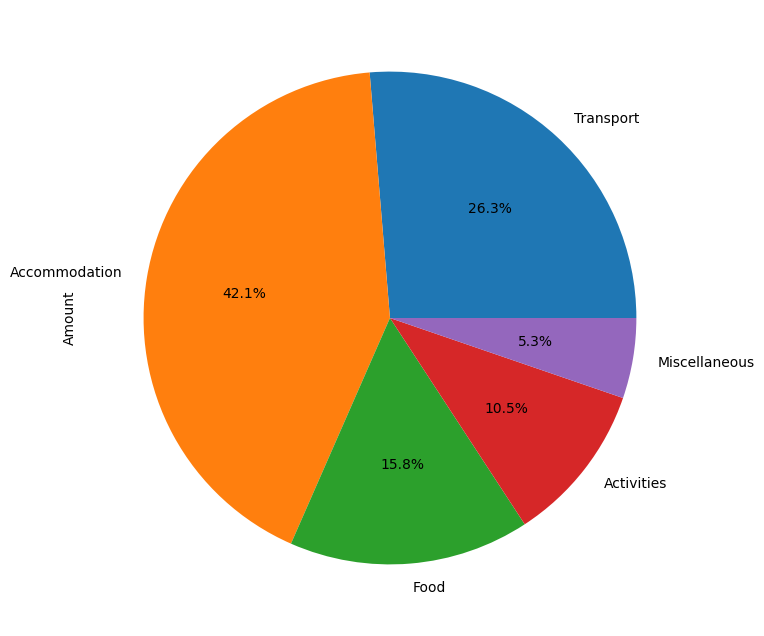

In [22]:
import pandas as pd

def generate_spending_report():
    # Predefined categories and expenses (can be modified to user input or loaded from a file)
    expense_data = {
        'Category': ['Transport', 'Accommodation', 'Food', 'Activities', 'Miscellaneous'],
        'Amount': [250, 400, 150, 100, 50]
    }

    # Create a DataFrame from the data
    df = pd.DataFrame(expense_data)

    # Calculate total spending
    total_spending = df['Amount'].sum()

    # Calculate the percentage spent in each category
    df['Percentage of Total'] = (df['Amount'] / total_spending) * 100

    # Display the summary report
    print("Spending Report by Category:")
    print(df)

    # Show the total spending
    print(f"\nTotal Spending: ${total_spending:.2f}")

    # Generate and display a simple pie chart for the spending distribution
    df.set_index('Category')['Amount'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), legend=False)

# Example usage
generate_spending_report()

In [27]:
import requests
from datetime import datetime

# Function to get weather data from OpenWeatherMap API
def get_weather(city, date, api_key):
    # Convert the date to Unix timestamp
    timestamp = int(datetime.strptime(date, "%Y-%m-%d").timestamp())

    # OpenWeatherMap API URL (historical weather data API)
    url = f"http://api.openweathermap.org/data/2.5/onecall/timemachine"

    # Parameters for the API
    params = {
        'lat': city['lat'],
        'lon': city['lon'],
        'dt': timestamp,
        'appid': api_key,
        'units': 'metric'  # For temperature in Celsius
    }

    # Send GET request to OpenWeatherMap API
    response = requests.get(url, params=params)
    weather_data = response.json()

    if response.status_code == 200:
        # Extract and display weather information
        weather = weather_data['current']
        temp = weather['temp']
        weather_description = weather['weather'][0]['description']
        print(f"Weather on {date} in {city['name']}:\nTemperature: {temp}°C\nDescription: {weather_description}")
    else:
        print(f"Error fetching weather data: {weather_data.get('message', 'Unknown error')}")

# Function to allow user input for destination and travel dates
def user_input_for_weather():
    # List of destinations with lat/lon for OpenWeatherMap API
    destinations = {
        "New York": {"lat": 40.7128, "lon": -74.0060, "name": "New York"},
        "Paris": {"lat": 48.8566, "lon": 2.3522, "name": "Paris"},
        "Tokyo": {"lat": 35.6762, "lon": 139.6503, "name": "Tokyo"},
        "London": {"lat": 51.5074, "lon": -0.1278, "name": "London"},
        "Sydney": {"lat": -33.8688, "lon": 151.2093, "name": "Sydney"}
    }

    # Get the user's destination and date input
    destination_name = input("Enter destination (e.g., New York, Paris, Tokyo, London, Sydney): ")
    date = input("Enter travel date (YYYY-MM-DD): ")

    if destination_name in destinations:
        # Get the API key
        api_key = input("Enter your OpenWeatherMap API Key: ")

        # Fetch and display the weather for the chosen destination
        city = destinations[destination_name]
        get_weather(city, date, api_key)
    else:
        print("Sorry, that destination is not in our list. Please try again.")

# Example usage
user_input_for_weather()

Enter destination (e.g., New York, Paris, Tokyo, London, Sydney): Paris
Enter travel date (YYYY-MM-DD): 2025-01-07
Enter your OpenWeatherMap API Key: 2
Error fetching weather data: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.


In [28]:
def travel_tips(destination):
    # Define a dictionary of tips for each destination
    tips = {
        "Paris": {
            "Packing List": [
                "Comfortable shoes for walking",
                "An umbrella (Paris can be rainy)",
                "Power adapter (France uses type C and E plugs)",
                "Light layers for fluctuating temperatures"
            ],
            "Safety Guidelines": [
                "Beware of pickpockets, especially in crowded areas like the Eiffel Tower",
                "Use reputable taxi services or apps like Uber",
                "Keep your valuables in a secure bag or money belt"
            ]
        },
        "New York": {
            "Packing List": [
                "Comfortable walking shoes",
                "Layers, as the weather can change quickly",
                "Portable phone charger",
                "A backpack or daypack for carrying essentials"
            ],
            "Safety Guidelines": [
                "Avoid dark, isolated areas at night",
                "Use well-lit streets and stay alert in busy crowds",
                "Know emergency exit routes in case of an emergency"
            ]
        },
        "Tokyo": {
            "Packing List": [
                "Comfortable shoes for walking",
                "Portable charger (Tokyo is known for long days of sightseeing)",
                "A lightweight rain jacket",
                "Japanese phrasebook or translation app"
            ],
            "Safety Guidelines": [
                "Follow pedestrian signals; traffic can be busy",
                "Always carry your ID or passport while sightseeing",
                "Avoid talking loudly in public places"
            ]
        },
        "Sydney": {
            "Packing List": [
                "Sunscreen and hat (Australia has strong sun)",
                "Swimsuit for the beaches",
                "Comfortable shoes for outdoor activities",
                "Camera for scenic views"
            ],
            "Safety Guidelines": [
                "Stay hydrated, especially in hot weather",
                "Beware of strong tides and currents at the beach",
                "Be mindful of wildlife, especially snakes and spiders"
            ]
        }
    }

    # Check if the destination is in the tips dictionary
    if destination in tips:
        print(f"Tips for {destination}:\n")
        print("Packing List:")
        for item in tips[destination]["Packing List"]:
            print(f"- {item}")

        print("\nSafety Guidelines:")
        for guideline in tips[destination]["Safety Guidelines"]:
            print(f"- {guideline}")
    else:
        print("Sorry, we don't have tips for this destination yet.")

# Example usage
destination = input("Enter your destination (e.g., Paris, New York, Tokyo, Sydney): ")
travel_tips(destination)


Enter your destination (e.g., Paris, New York, Tokyo, Sydney): Paris
Tips for Paris:

Packing List:
- Comfortable shoes for walking
- An umbrella (Paris can be rainy)
- Power adapter (France uses type C and E plugs)
- Light layers for fluctuating temperatures

Safety Guidelines:
- Beware of pickpockets, especially in crowded areas like the Eiffel Tower
- Use reputable taxi services or apps like Uber
- Keep your valuables in a secure bag or money belt


In [29]:
def convert_expenses():
    # Predefined currency conversion rates (for simplicity, using static rates)
    conversion_rates = {
        "USD": 1,        # USD to USD
        "EUR": 0.91,     # USD to EUR
        "GBP": 0.75,     # USD to GBP
        "JPY": 140.00,   # USD to JPY
        "AUD": 1.50,     # USD to AUD
    }

    # Ask the user for the amount in their selected currency (USD)
    amount = float(input("Enter the amount in USD: "))

    print("\nSelect the currency to convert to:")
    print("1. EUR (Euro)")
    print("2. GBP (British Pound)")
    print("3. JPY (Japanese Yen)")
    print("4. AUD (Australian Dollar)")

    # Ask the user for their currency choice
    choice = input("Enter your choice (1/2/3/4): ")

    # Perform conversion based on the user's choice
    if choice == "1":
        converted_amount = amount * conversion_rates["EUR"]
        print(f"Converted amount in EUR: {converted_amount:.2f}")
    elif choice == "2":
        converted_amount = amount * conversion_rates["GBP"]
        print(f"Converted amount in GBP: {converted_amount:.2f}")
    elif choice == "3":
        converted_amount = amount * conversion_rates["JPY"]
        print(f"Converted amount in JPY: {converted_amount:.2f}")
    elif choice == "4":
        converted_amount = amount * conversion_rates["AUD"]
        print(f"Converted amount in AUD: {converted_amount:.2f}")
    else:
        print("Invalid choice. Please try again.")

# Example usage
convert_expenses()


Enter the amount in USD: 1000

Select the currency to convert to:
1. EUR (Euro)
2. GBP (British Pound)
3. JPY (Japanese Yen)
4. AUD (Australian Dollar)
Enter your choice (1/2/3/4): 1
Converted amount in EUR: 910.00


In [30]:
import csv

# Function to add a new trip
def add_trip():
    # Get trip details from the user
    destination = input("Enter destination: ")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")
    activities = input("Enter activities planned: ")
    accommodation = input("Enter accommodation details: ")
    transport = input("Enter transport details: ")

    # Append the new trip to the CSV file
    with open("travel_itineraries.csv", mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([destination, start_date, end_date, activities, accommodation, transport])
    print("Trip added successfully!")

# Function to view all trips
def view_trips():
    try:
        with open("travel_itineraries.csv", mode='r') as file:
            reader = csv.reader(file)
            print("\nTrips List:")
            for row in reader:
                print(f"Destination: {row[0]}\nStart Date: {row[1]}\nEnd Date: {row[2]}")
                print(f"Activities: {row[3]}\nAccommodation: {row[4]}\nTransport: {row[5]}")
                print("-" * 40)
    except FileNotFoundError:
        print("No trips found. Please add a trip first.")

# Function to edit a trip
def edit_trip():
    destination = input("Enter the destination of the trip you want to edit: ")
    found = False
    trips = []

    try:
        # Read all trips into a list
        with open("travel_itineraries.csv", mode='r') as file:
            reader = csv.reader(file)
            trips = list(reader)

        # Edit the trip details
        for i, trip in enumerate(trips):
            if trip[0].lower() == destination.lower():
                found = True
                print(f"Editing trip: {trip[0]}")
                trip[1] = input(f"Enter new start date (Current: {trip[1]}): ")
                trip[2] = input(f"Enter new end date (Current: {trip[2]}): ")
                trip[3] = input(f"Enter new activities (Current: {trip[3]}): ")
                trip[4] = input(f"Enter new accommodation (Current: {trip[4]}): ")
                trip[5] = input(f"Enter new transport (Current: {trip[5]}): ")
                break

        if not found:
            print(f"No trip found for destination: {destination}")
            return

        # Rewrite the file with the updated trip list
        with open("travel_itineraries.csv", mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(trips)
        print("Trip updated successfully!")

    except FileNotFoundError:
        print("No trips found. Please add a trip first.")

# Menu function
def menu():
    while True:
        print("\n--- Trip Management Menu ---")
        print("1. Add a Trip")
        print("2. View Trips")
        print("3. Edit a Trip")
        print("4. Exit")

        choice = input("Enter your choice (1/2/3/4): ")

        if choice == "1":
            add_trip()
        elif choice == "2":
            view_trips()
        elif choice == "3":
            edit_trip()
        elif choice == "4":
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the menu
menu()



--- Trip Management Menu ---
1. Add a Trip
2. View Trips
3. Edit a Trip
4. Exit
Enter your choice (1/2/3/4): 2

Trips List:
Destination: Destination
Start Date: Start Date
End Date: End Date
Activities: Activities
Accommodation: Accommodation
Transport: Transport
----------------------------------------
Destination: Paris
Start Date: 2024-12-02
End Date: 2024-12-07
Activities: Eiffel Tower visit
Accommodation: Hotel Le Meurice
Transport: Flight
----------------------------------------
Destination: Rome
Start Date: 2024-12-20
End Date: 2024-12-26
Activities: Trevi Fountain
Accommodation: Hotel Le Meridian
Transport: Flight
----------------------------------------
Destination: London
Start Date: 2025-01-07
End Date: 2025-01-11
Activities: Tower of London
Accommodation: Hotel Intercontinental
Transport: Flight
----------------------------------------
Destination: Goa
Start Date: 2025-02-02
End Date: 2025-02-07
Activities: Dudhsagar Falls
Accommodation: Hotel Vincent
Transport: Flight
---